In [1]:
# can run from base

import os
import pickle

# from functions import * # import util functions
from collections import Counter
import numpy as np
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output

In [2]:
def get_df(att_dict = 1):
    """att_dict should be 1,2,3"""

    path = "/home/simon/Documents/Bodies/data/RA/att_dicts"

    file_name1 = "pregenerated_indx_list.pkl"
    file_path = os.path.join(path, file_name1)

    # Open the file in binary mode
    with open(file_path, 'rb') as file:
        
        # Call load method to deserialze
        pregenerated_indx_list = pickle.load(file)

    file_name2 = f"att_dict_{att_dict}.pkl"
    file_path = os.path.join(path, file_name2)

    if os.path.exists(file_path):

        # Open the file in binary mode
        with open(file_path, 'rb') as file:
        
            # Call load method to deserialze
            att_dict = pickle.load(file)

        df_img = pd.DataFrame(pregenerated_indx_list, columns=['img1', 'img2'])
        df_att = pd.DataFrame(att_dict, columns= att_dict.keys())
        df_att.drop(['indx_indicator'], axis=1, inplace= True)
        df = df_att.join(df_img)

        columns_dict= { 'att0' : 'negative_emotions_t1', 'att1': 'negative_emotions_t2', 'att2': 'mass_protest', 
                        'att3': 'damaged_property', 'att4': 'privat', 'att5': 'public', 
                        'att6': 'militarized', 'att7': 'rural', 'att8': 'urban', 'att9': 'formal' }

        df.rename(columns= columns_dict, inplace= True)

    else: 
        print('That att_dict does not exist. Use 1, 2, or 3.')

    return(df)



In [3]:
def print_zero_ratio(df):

    print("Ratio of (0,0)'s in each feature:\n")

    for i in df.columns[:-2]:
        ratio = (df[i] == (0,0)).sum() / df.shape[0]
        print(f'{i}: {ratio*100:.3}%')


In [4]:
def get_non_zero_dfs(df):

    df_dict = {}

    for i in df.columns[:-2]:
        df_dict[i] = df[df[i] != (0,0)][['img1', 'img2', i]]

    return(df_dict)


In [5]:
def analyse_network(G, plot = True):

    print(f'Number of edges: {len(G.edges)}') # same as len(indx_list)
    print(f'Number of nodes: {len(G.nodes)}') # same as len(indx_list)
    print(f'Connected network: {nx.is_connected(G)}')

    G_degrees = list(dict(G.degree).values())

    print(f'Mean degrees: {np.mean(G_degrees)}')
    print(f'Min degrees: {np.min(G_degrees)}')
    print(f'Max degrees: {np.max(G_degrees)}')

    if plot == True:

        plt.figure(figsize=[20,5])

        plt.subplot(1,3,1)
        plt.title('network random layout')
        nx.draw(G, pos=nx.random_layout(G), node_size = 50, node_color = 'blue', alpha = 0.2, width = 0.5, edge_color = 'black')

        plt.subplot(1,3,2)
        plt.title('network spring layout')
        nx.draw(G, pos=nx.spring_layout(G), node_size = 50, node_color = 'blue', alpha = 0.2, width = 0.5, edge_color = 'black')

        plt.subplot(1,3,3)
        plt.title('network degree distribution')
        plt.hist(G_degrees, density=True, bins= 50)
        sns.kdeplot(G_degrees)

        plt.show()
        

In [9]:
def check_networks(df_dict):
    for i in df_dict.keys():
        sub_df = df_dict[i]
        edge_list = list(zip(sub_df['img1'], sub_df['img2']))
        g = nx.Graph()
        g.add_edges_from(edge_list)
        print(i)
        analyse_network(g, True)

In [10]:
df = get_df()
print_zero_ratio(df)
df_dict = get_non_zero_dfs(df)

Ratio of (0,0)'s in each feature:

negative_emotions_t1: 19.5%
negative_emotions_t2: 14.2%
mass_protest: 58.1%
damaged_property: 25.5%
privat: 2.01%
public: 1.6%
militarized: 34.2%
rural: 1.4%
urban: 1.27%
formal: 6.09%


negative_emotions_t1
Number of edges: 5642
Number of nodes: 2092
Connected network: True
Mean degrees: 5.393881453154876
Min degrees: 1
Max degrees: 14


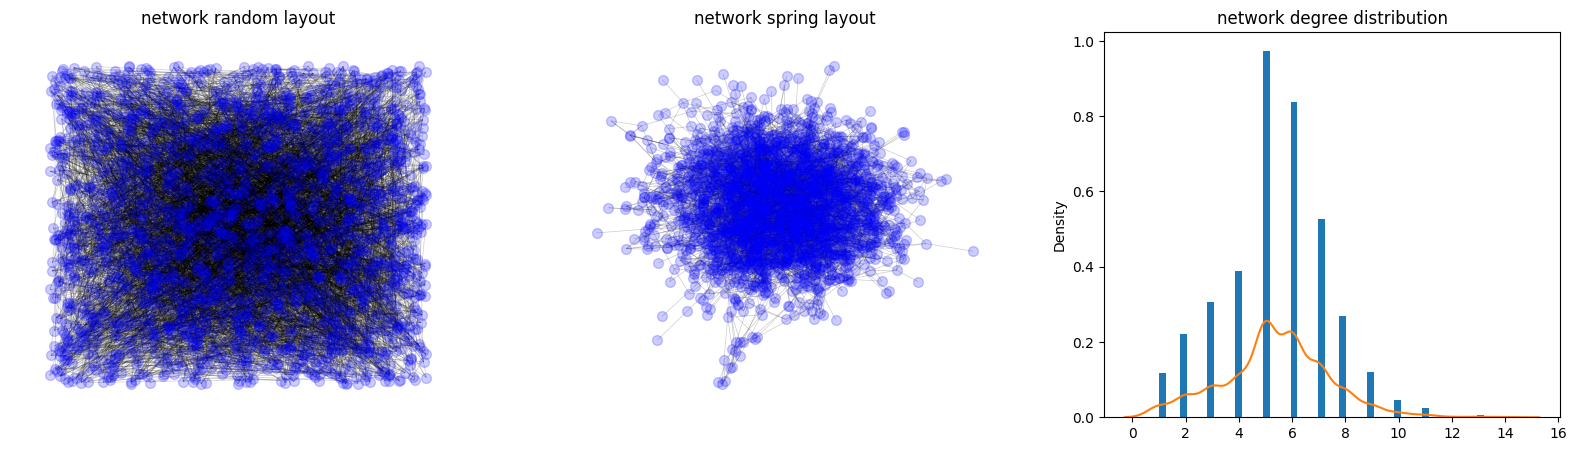

negative_emotions_t2
Number of edges: 6010
Number of nodes: 2113
Connected network: True
Mean degrees: 5.688594415522953
Min degrees: 1
Max degrees: 13


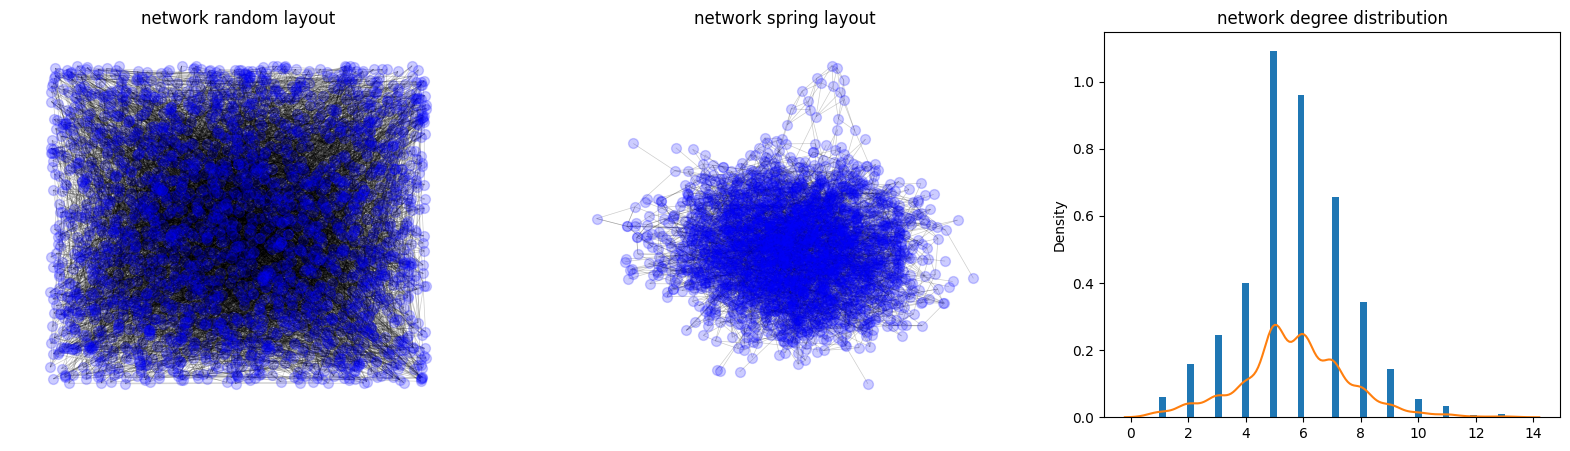

mass_protest
Number of edges: 2934
Number of nodes: 1808
Connected network: False
Mean degrees: 3.245575221238938
Min degrees: 1
Max degrees: 13


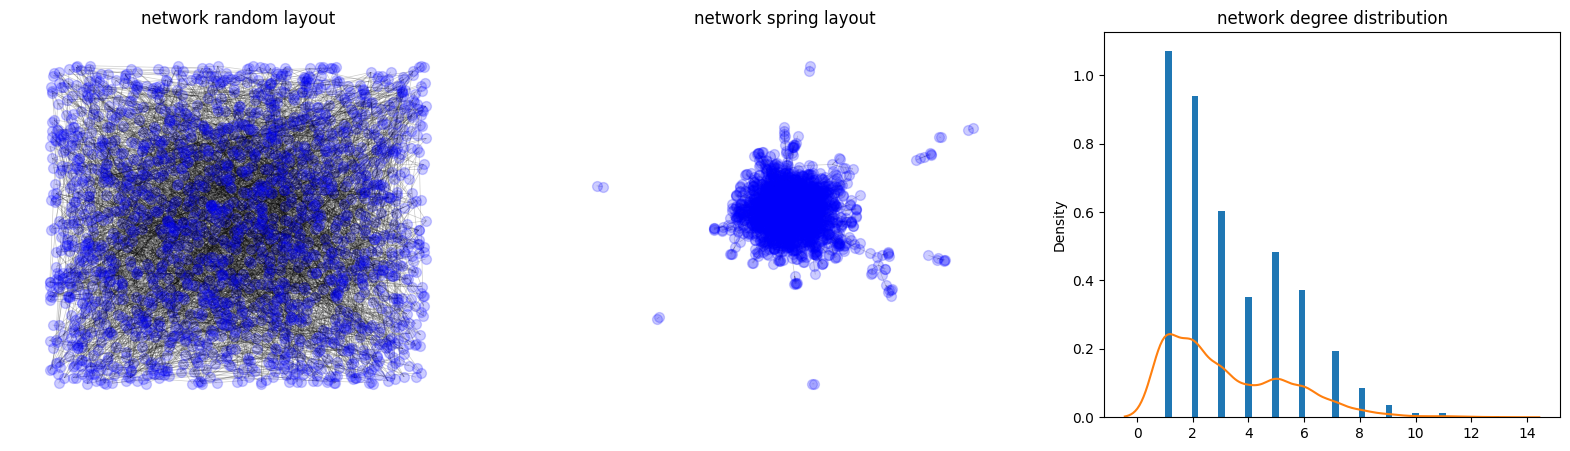

damaged_property
Number of edges: 5217
Number of nodes: 2101
Connected network: True
Mean degrees: 4.966206568300809
Min degrees: 1
Max degrees: 13


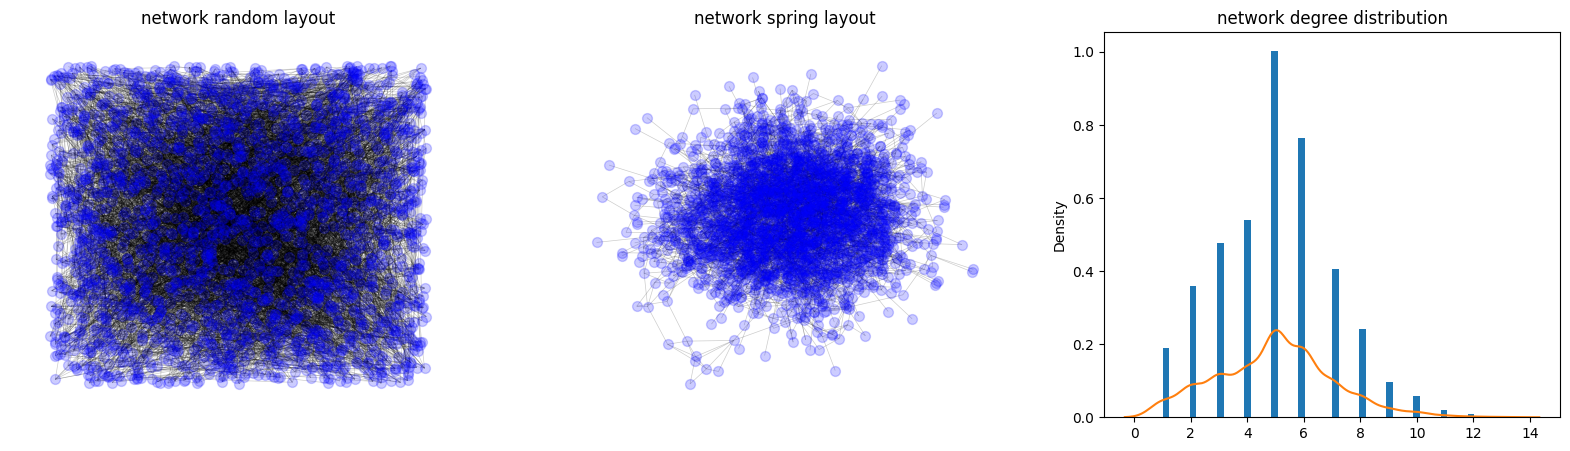

privat
Number of edges: 6866
Number of nodes: 2118
Connected network: True
Mean degrees: 6.483474976392824
Min degrees: 1
Max degrees: 17


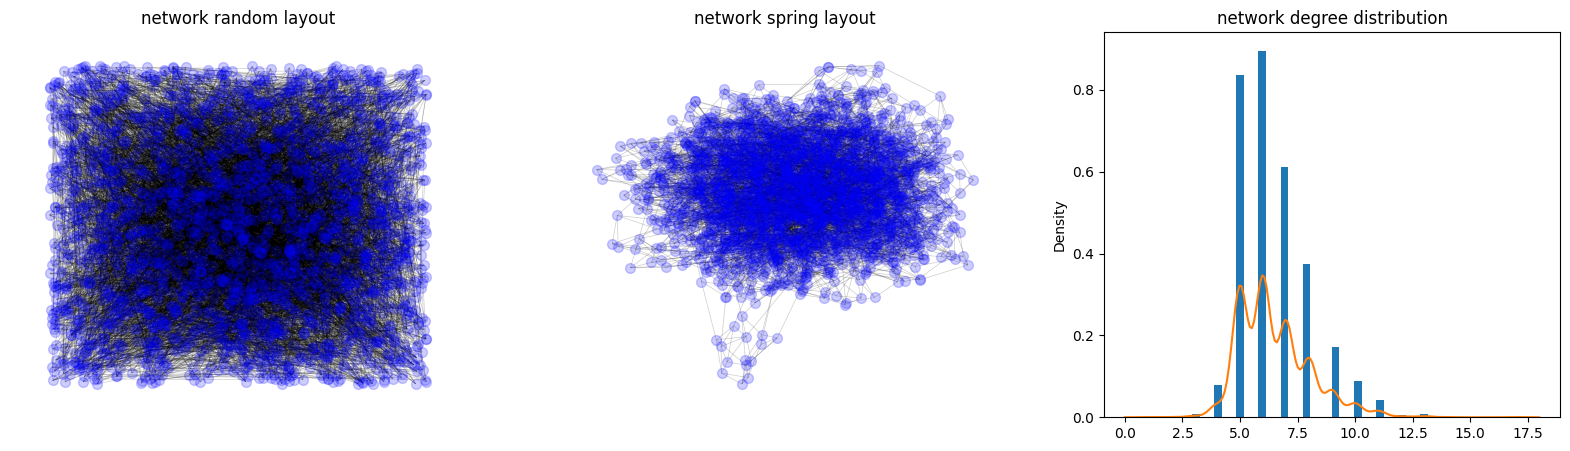

public
Number of edges: 6895
Number of nodes: 2118
Connected network: True
Mean degrees: 6.5108593012275735
Min degrees: 3
Max degrees: 17


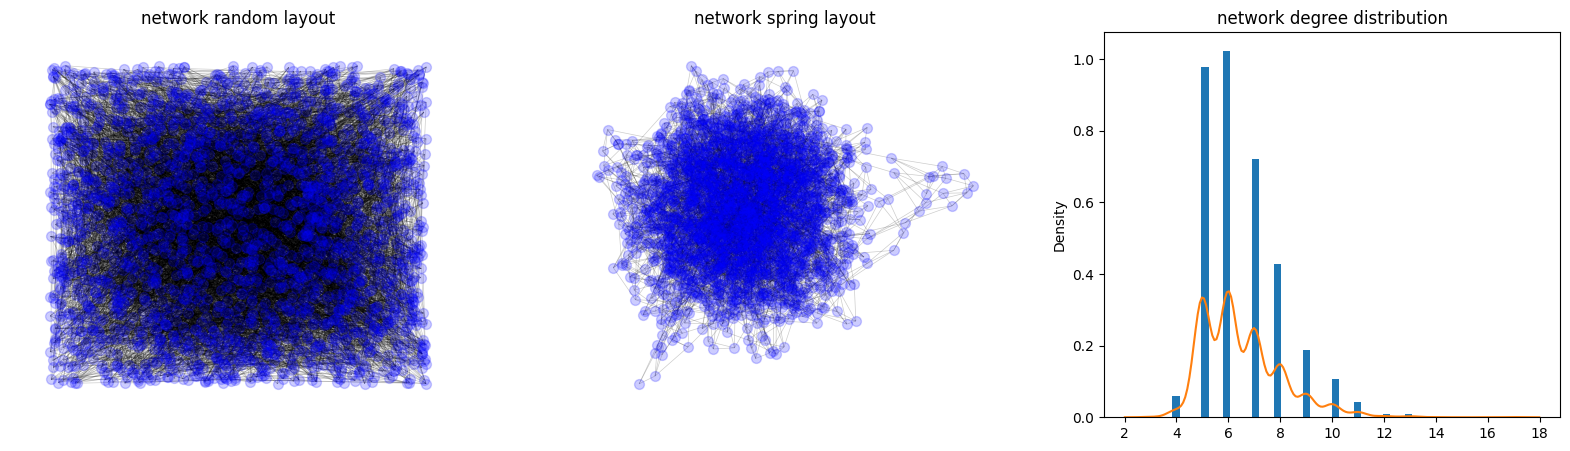

militarized
Number of edges: 4608
Number of nodes: 2075
Connected network: True
Mean degrees: 4.44144578313253
Min degrees: 1
Max degrees: 14


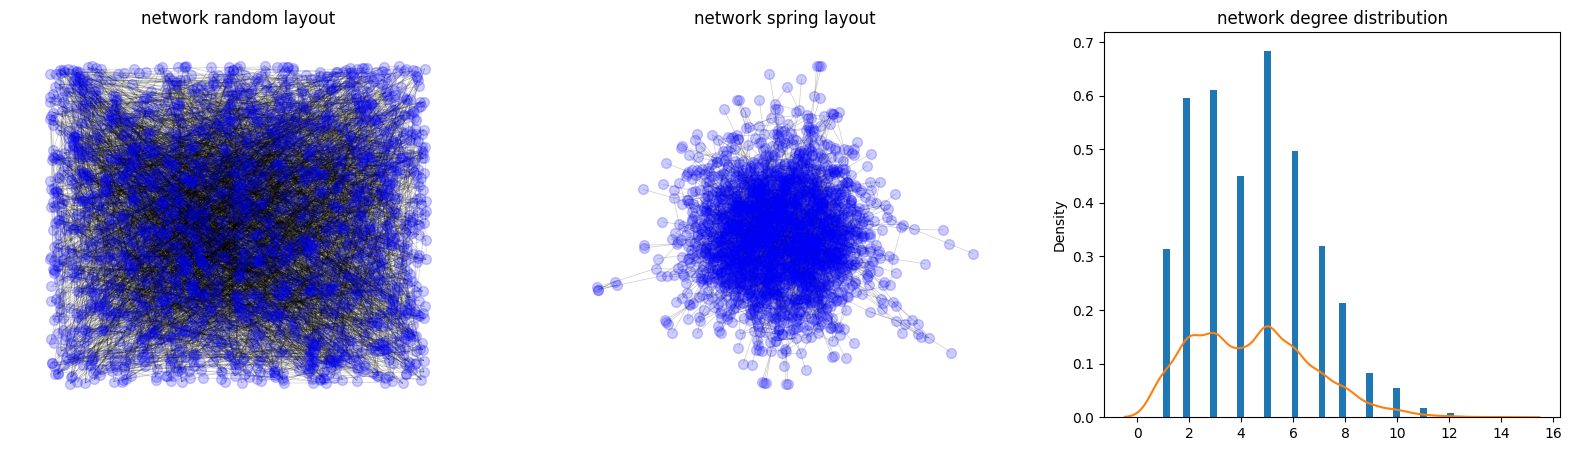

rural
Number of edges: 6909
Number of nodes: 2118
Connected network: True
Mean degrees: 6.524079320113314
Min degrees: 2
Max degrees: 17


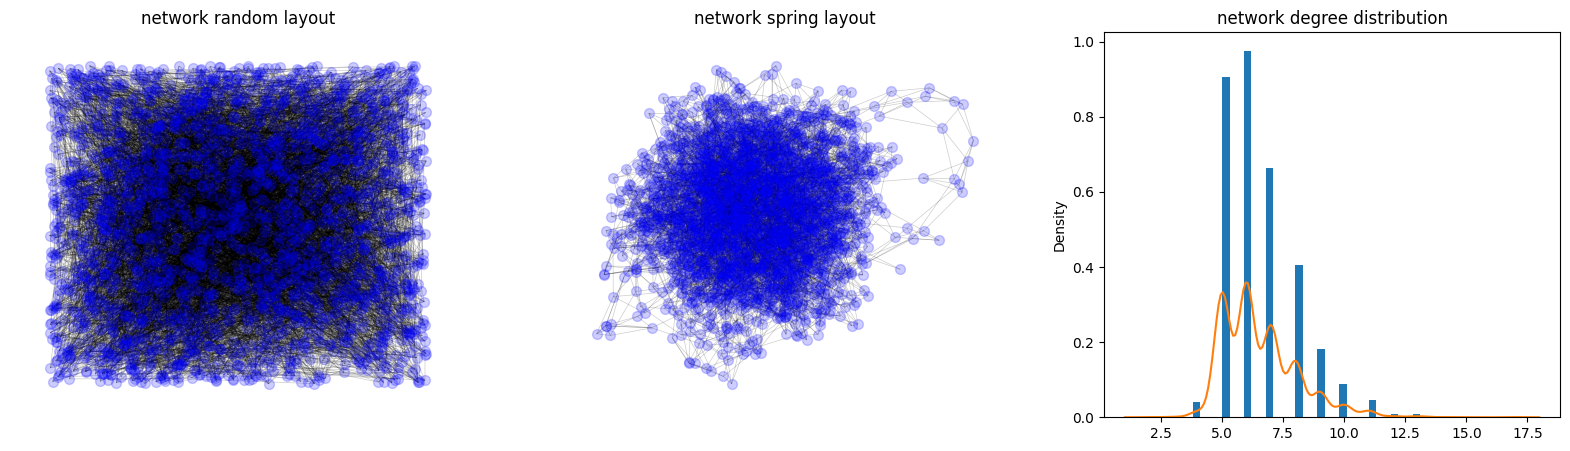

urban
Number of edges: 6918
Number of nodes: 2118
Connected network: True
Mean degrees: 6.53257790368272
Min degrees: 3
Max degrees: 17


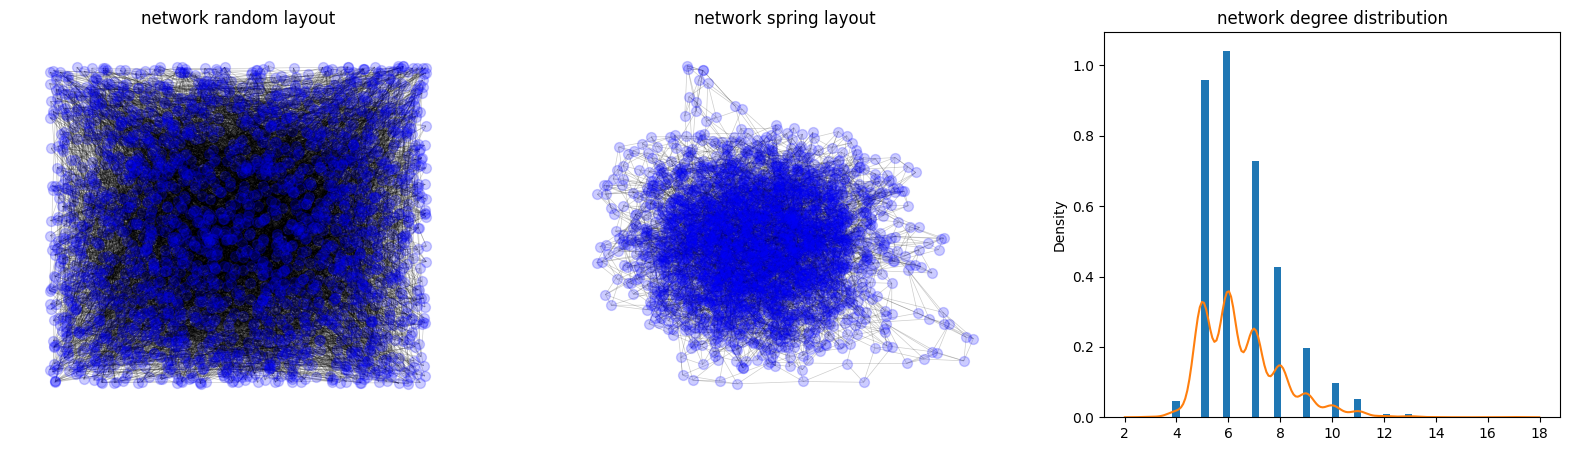

formal
Number of edges: 6580
Number of nodes: 2118
Connected network: True
Mean degrees: 6.213408876298395
Min degrees: 1
Max degrees: 14


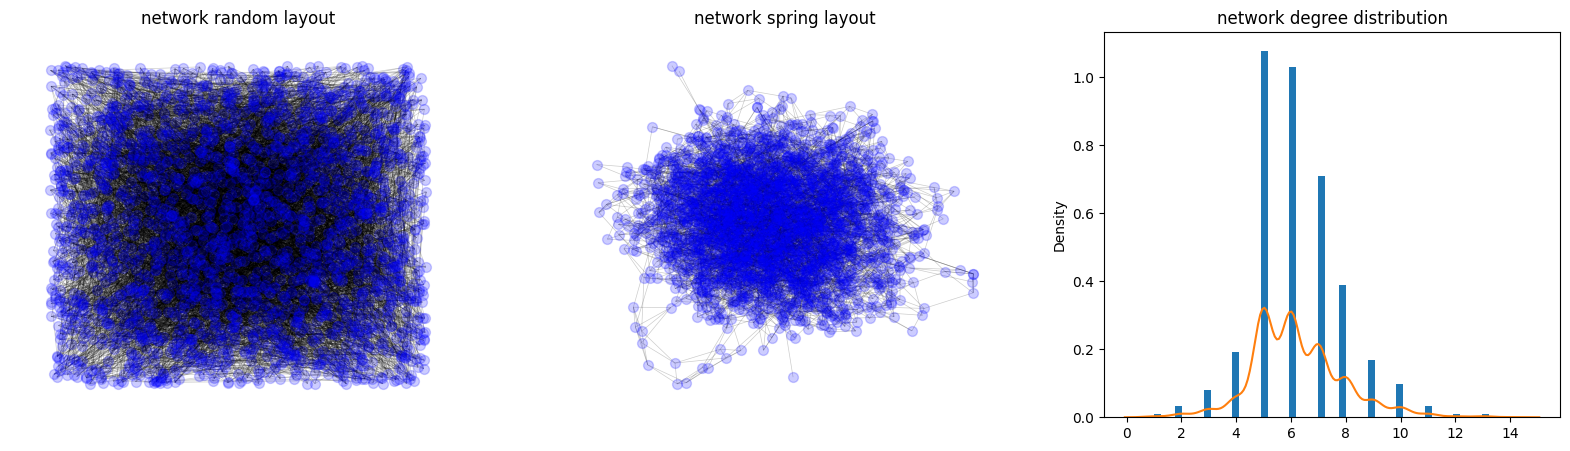

In [11]:
check_networks(df_dict)

In [ ]:
# so. mass protest have sp many (0,0)'s that that the network is no longer connected after sorting. This should be ammended

In [10]:
sub_df = df_dict['negative_emotions_t1']
edge_list = list(zip(sub_df['img1'], sub_df['img2']))
g = nx.Graph()
g.add_edges_from(edge_list)

In [11]:
g

In [14]:
analyse_network(g, False)

Number of edges: 5642
Number of nodes: 2092
Connected network: True
Mean degrees: 5.393881453154876
Min degrees: 1
Max degrees: 14


Number of edges: 5642
Number of nodes: 2092
Connected network: True
Mean degrees: 5.393881453154876
Min degrees: 1
Max degrees: 14


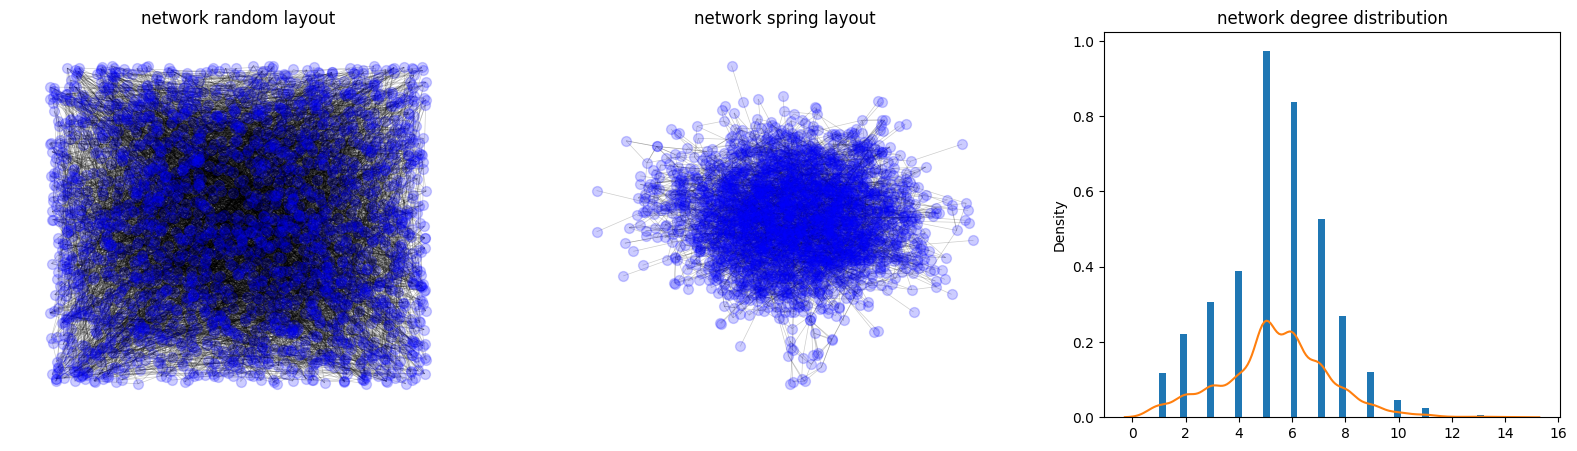

In [8]:
df_dict.keys()

dict_keys(['negative_emotions_t1', 'negative_emotions_t2', 'mass_protest', 'damaged_property', 'privat', 'public', 'militarized', 'rural', 'urban', 'formal'])

In [ ]:
def get_Gs(att_list):

    """Sub-funciton for .... fits in ...."""

    att_sub_df = att_list.copy() # this zero must be an i to iterate over..

    edge_list_non_zero = list(zip(att_sub_df['img1'], att_sub_df['img2']))

    # Full graph g
    g = nx.Graph()
    g.add_edges_from(edge_list_non_zero)

    # Get larges connected subset:
    connected_img = sorted(nx.connected_components(g), key = len, reverse=True)[0] # take the larges connected component

    edge_list_connected = []

    for i, j in edge_list_non_zero:    
        if i in connected_img or j in connected_img: # should only ned one, but better safe than sorry
            edge_list_connected.append((i,j))

    # Larges connected subgraph gc
    gc = nx.Graph()
    gc.add_edges_from(edge_list_connected)

    return(g, gc, att_sub_df)

# g, gc, att_sub_df = get_Gs(att_list[0])